# Overview of perturbations with inconsistent atom mapping

In [45]:
import glob
import csv
import re
import pandas as pd
import itertools
import numpy as np
from tqdm.notebook import tqdm
import csv
import matplotlib.pyplot as plt 
import seaborn as sns 
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
from collections import defaultdict

from rdkit import Chem, RDLogger
RDLogger.DisableLog('rdApp.warning')
from rdkit.Chem import Draw, rdFMCS

from rdkit.Chem import rdRGroupDecomposition, AllChem, rdmolops
from rdkit.Chem import rdqueries
from rdkit.Chem import rdDepictor, rdmolfiles
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit import Geometry
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole

from IPython.display import display
from IPython.display import SVG,Image
import matplotlib.image as mpimg

import BioSimSpace as BSS
%matplotlib inline


In [46]:
quints_infos = pd.read_csv("output/quints_infos.csv", names=["set", "pertname", "pertsmarts", "num_ha", "sem"])
quints_infos.sort_values(by="sem")

,set,pertname,pertsmarts,num_ha,sem
852,TrainingSet,mobley_1563176~mobley_2802855,[C*]S~[C*]Br,1,0.006843
853,TrainingSet,mobley_2802855~mobley_1563176,[C*]Br~[C*]S,1,0.006843
4208,TrainingSet,mobley_1755375~mobley_5571660,[C*]O~[C*]N,1,0.008176
4209,TrainingSet,mobley_5571660~mobley_1755375,[C*]N~[C*]O,1,0.008176
1818,TrainingSet,mobley_186894~mobley_7708038,[C*]S~[C*]Br,1,0.010947
...,...,...,...,...,...
4216,TrainingSet,mobley_2043882~mobley_6175884,[C*]C~[C*]C,1,26.331465
531,TrainingSet,mobley_4218209~mobley_1036761,[C*]OC~,2,33.708322
530,TrainingSet,mobley_1036761~mobley_4218209,~[C*]OC,2,33.708322
1092,TrainingSet,mobley_1036761~mobley_2859600,[CH*]N~[C*]CC,2,38.086474


In [47]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

In [51]:
def plotInfo(ligname1, ligname2):
    """Plots pert mols with atom indices and atom mappings with and without sanitisation."""
    
    
    mol1 = BSS.IO.readPDB("./quintup_ligands/ligand_files/{}.pdb".format(ligname1))[0]
    mol2 = BSS.IO.readPDB("./quintup_ligands/ligand_files/{}.pdb".format(ligname2))[0]

    mol1_r = Chem.SDMolSupplier("./quintup_ligands/sdffiles/{}.sdf".format(ligname1))[0]
    mol2_r = Chem.SDMolSupplier("./quintup_ligands/sdffiles/{}.sdf".format(ligname2))[0]

    mol1_r = rdmolops.AddHs(mol1_r)
    mol2_r = rdmolops.AddHs(mol2_r)
    
    AllChem.Compute2DCoords(mol1_r)
    AllChem.Compute2DCoords(mol2_r)
    


    mapping = BSS.Align.matchAtoms(mol1, mol2)
    mapping_s = BSS.Align.matchAtoms(mol1, mol2, sanitize=True)
    
    if mapping != mapping_s:

        print(ligname1, "->", ligname2)
        print("Default:")
        print(mapping)
        print("Sanitised:")
        print(mapping_s)

        png = Draw.MolsToGridImage([mol_with_atom_index(mol1_r), mol_with_atom_index(mol2_r)], returnPNG=True)
        display(png)
        print("__________________________________________________________________________________________________________")


# Find mapping mismatches between sanitised & non-sanitised

  0%|          | 0/4558 [00:00<?, ?it/s]

mobley_1520842 -> mobley_6988468
Default:
{0: 0, 1: 1, 6: 2, 5: 3, 4: 4, 3: 5, 2: 6, 10: 16, 11: 15, 12: 13, 13: 7, 7: 10, 8: 9, 9: 8}
Sanitised:
{0: 1, 1: 2, 2: 7, 3: 6, 4: 5, 5: 4, 6: 3, 13: 13, 12: 14, 11: 16, 7: 0, 8: 11, 9: 12}


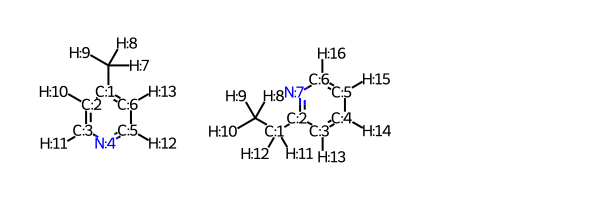

__________________________________________________________________________________________________________
mobley_1571523 -> mobley_7295828
Default:
{0: 0, 1: 1, 6: 2, 7: 7, 16: 15, 5: 3, 4: 4, 3: 5, 2: 6, 12: 14, 13: 13, 14: 12, 8: 11, 9: 10, 10: 9, 11: 8}
Sanitised:
{10: 0, 0: 1, 1: 2, 2: 7, 3: 6, 4: 5, 5: 4, 6: 3, 7: 11, 8: 12, 14: 13, 13: 14, 12: 15}


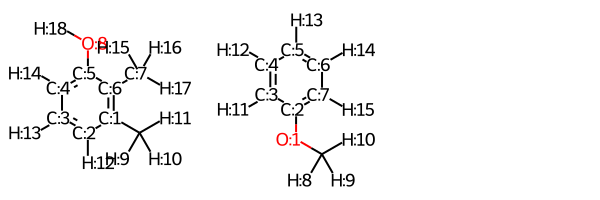

__________________________________________________________________________________________________________
mobley_1363784 -> mobley_6303022
Default:
{7: 0, 3: 1, 2: 11, 4: 2, 5: 3, 6: 4, 1: 5, 0: 6, 9: 15, 13: 14, 12: 7, 14: 8, 15: 10, 16: 9}
Sanitised:
{0: 1, 1: 2, 2: 7, 3: 6, 4: 5, 5: 4, 6: 3, 13: 13, 7: 15, 11: 16, 8: 0, 9: 11, 10: 12}


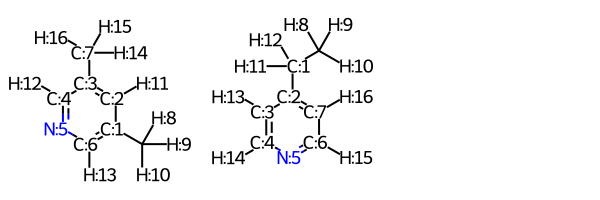

__________________________________________________________________________________________________________
mobley_1571523 -> mobley_7010316
Default:
{0: 4, 1: 3, 2: 6, 12: 18, 6: 2, 5: 1, 4: 0, 3: 7, 14: 8, 8: 9, 7: 12, 9: 5, 11: 14, 10: 15}
Sanitised:
{0: 6, 1: 3, 2: 2, 3: 1, 4: 0, 5: 5, 6: 4, 7: 15, 8: 16, 14: 8, 13: 9, 12: 12, 11: 18}


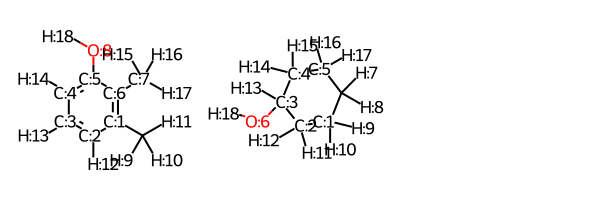

__________________________________________________________________________________________________________
mobley_1571523 -> mobley_1858644
Default:
{7: 7, 6: 6, 5: 14, 1: 3, 2: 2, 3: 1, 4: 0, 14: 9, 13: 10, 12: 11, 0: 4, 10: 5, 11: 12, 17: 8, 15: 16, 16: 17}
Sanitised:
{0: 6, 1: 3, 2: 2, 3: 1, 4: 0, 5: 5, 6: 4, 7: 12, 8: 13, 14: 9, 13: 10, 12: 11, 9: 7, 10: 14, 11: 15}


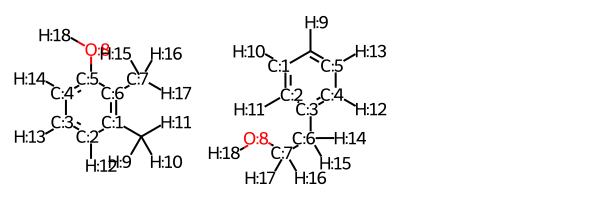

__________________________________________________________________________________________________________
mobley_9942801 -> mobley_3452749
Default:
{0: 8, 1: 5, 2: 4, 7: 14, 3: 3, 4: 2, 5: 1, 6: 6, 16: 7, 8: 0, 18: 10, 19: 11, 20: 9, 15: 12, 14: 13, 9: 20, 10: 19, 11: 18}
Sanitised:
{18: 9, 8: 0, 5: 1, 6: 2, 7: 3, 2: 4, 3: 5, 4: 6, 15: 7, 14: 8, 1: 14, 17: 13, 16: 12, 19: 10, 20: 11}


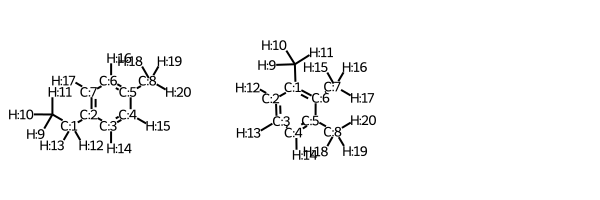

__________________________________________________________________________________________________________
mobley_1873346 -> mobley_2689721
Default:
{0: 4, 1: 3, 2: 13, 6: 2, 5: 1, 4: 0, 3: 6, 12: 7, 13: 8, 14: 10, 8: 5, 9: 14, 7: 15}
Sanitised:
{0: 16, 1: 5, 2: 0, 3: 1, 4: 2, 5: 3, 6: 4, 14: 15, 13: 12, 12: 11, 11: 8, 10: 7}


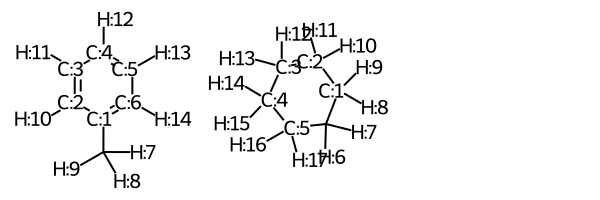

__________________________________________________________________________________________________________
mobley_1571523 -> mobley_9139060
Default:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 7, 8: 21, 14: 16, 13: 15, 12: 12, 6: 6, 7: 5, 17: 17, 15: 18, 10: 8, 11: 9, 9: 10}
Sanitised:
{0: 7, 1: 4, 2: 3, 3: 2, 4: 1, 5: 6, 6: 5, 7: 18, 8: 19, 14: 0, 13: 12, 12: 15, 11: 21, 10: 22, 9: 23}


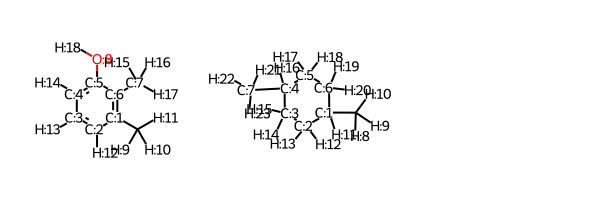

__________________________________________________________________________________________________________
mobley_2782339 -> mobley_4395315
Default:
{6: 0, 4: 1, 3: 2, 2: 3, 1: 4, 0: 5, 5: 6, 14: 7, 11: 14, 12: 13, 13: 8, 9: 12, 7: 11, 8: 10}
Sanitised:
{11: 0, 0: 1, 5: 2, 4: 3, 3: 4, 2: 5, 1: 6, 12: 7, 13: 14, 14: 12}


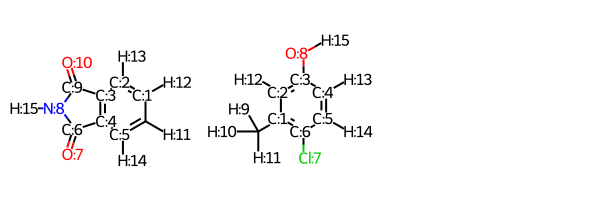

__________________________________________________________________________________________________________
mobley_1571523 -> mobley_2923700
Default:
{7: 0, 6: 1, 5: 12, 1: 2, 2: 7, 3: 6, 4: 5, 14: 8, 13: 16, 12: 17, 0: 3, 10: 4, 11: 14, 15: 9, 16: 11, 17: 10}
Sanitised:
{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 17, 8: 16, 14: 8, 13: 15, 12: 14, 11: 0, 9: 12, 10: 13}


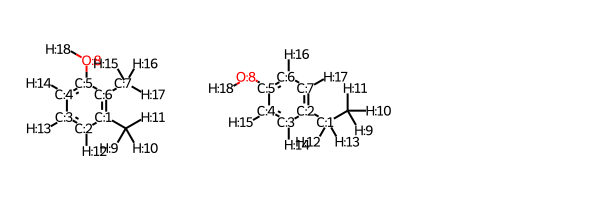

__________________________________________________________________________________________________________
mobley_1571523 -> mobley_4218209
Default:
{0: 0, 1: 1, 6: 2, 7: 7, 15: 6, 16: 15, 5: 3, 4: 4, 3: 5, 2: 8, 12: 16, 14: 13, 8: 12, 9: 11, 10: 10, 11: 9}
Sanitised:
{13: 1, 3: 2, 2: 3, 1: 4, 6: 5, 5: 6, 4: 7, 14: 15, 8: 14, 7: 8, 16: 17, 17: 16, 0: 13, 12: 12}


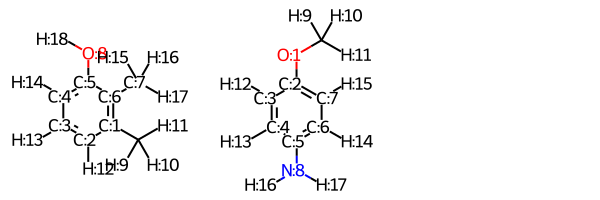

__________________________________________________________________________________________________________
mobley_9478823 -> mobley_1189457
Default:
{7: 0, 6: 1, 1: 2, 0: 3, 10: 11, 2: 7, 3: 6, 4: 5, 5: 4, 14: 12, 13: 13, 12: 14, 11: 15, 15: 9, 16: 8, 17: 10}
Sanitised:
{16: 0, 7: 1, 6: 2, 5: 7, 4: 6, 3: 5, 2: 4, 1: 3, 0: 11, 11: 12, 12: 13, 13: 14, 14: 15}


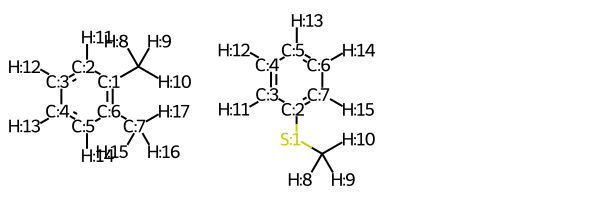

__________________________________________________________________________________________________________
mobley_1967551 -> mobley_2725802
Default:
{0: 0, 1: 1, 2: 2, 6: 3, 3: 8, 4: 10, 5: 9}
Sanitised:
{0: 0, 1: 1, 2: 2, 3: 8, 4: 10, 5: 9}


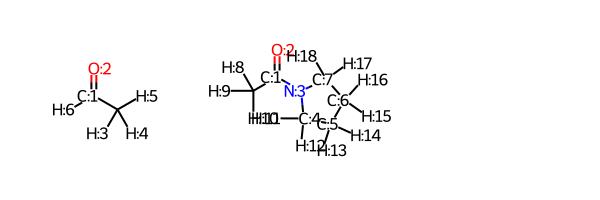

__________________________________________________________________________________________________________
mobley_1571523 -> mobley_2354112
Default:
{0: 7, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 8: 8, 18: 18, 14: 16, 13: 15, 12: 14, 6: 1, 7: 0, 15: 9, 16: 11, 17: 10, 11: 17}
Sanitised:
{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 17, 8: 8, 18: 18, 14: 16, 13: 15, 12: 14, 11: 0, 9: 12, 10: 13}


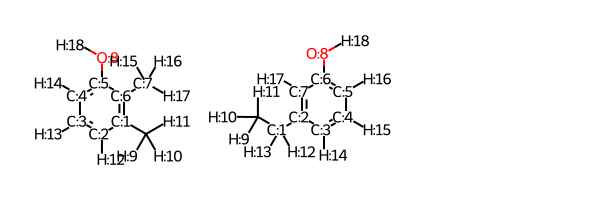

__________________________________________________________________________________________________________
mobley_5263791 -> mobley_5467162
Default:
{0: 17, 1: 3, 2: 1, 3: 2, 4: 15, 17: 16, 7: 4, 6: 9, 5: 23, 11: 8, 10: 7, 9: 6, 8: 5, 20: 20, 21: 21, 22: 10, 23: 22, 15: 18, 16: 19}
Sanitised:
{0: 2, 1: 1, 2: 4, 3: 9, 4: 8, 5: 7, 6: 6, 7: 5, 19: 10, 18: 22, 17: 23, 15: 0, 16: 3, 14: 14, 13: 15, 12: 16}


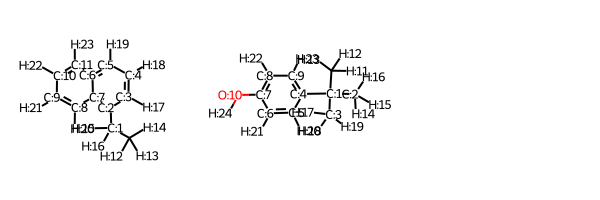

__________________________________________________________________________________________________________
mobley_1036761 -> mobley_5518547
Default:
{4: 5, 5: 6, 6: 7, 0: 1, 1: 2, 16: 14, 2: 3, 3: 4, 18: 15, 19: 16, 12: 12, 15: 13, 8: 0, 9: 11}
Sanitised:
{6: 0, 3: 1, 2: 2, 1: 3, 0: 4, 5: 5, 4: 6, 15: 14, 16: 13, 8: 7, 9: 12, 12: 11, 18: 9, 19: 8}


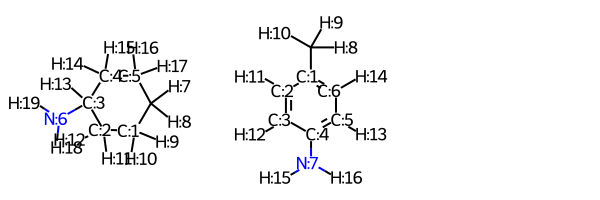

__________________________________________________________________________________________________________
mobley_9478823 -> mobley_2923700
Default:
{0: 0, 1: 1, 2: 13, 6: 2, 5: 3, 4: 4, 3: 5, 12: 8, 13: 15, 14: 14, 7: 7, 17: 6, 16: 17, 8: 9, 9: 11, 10: 10}
Sanitised:
{7: 1, 6: 2, 5: 3, 4: 4, 3: 5, 2: 6, 1: 7, 0: 17, 11: 16, 12: 8, 13: 15, 14: 14, 15: 0, 16: 12, 17: 13}


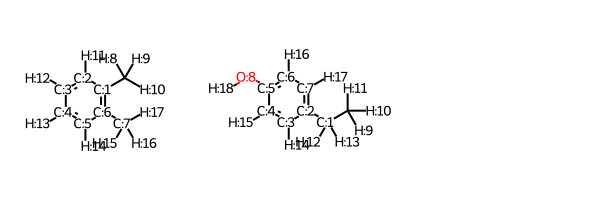

__________________________________________________________________________________________________________
mobley_9942801 -> mobley_8691603
Default:
{8: 0, 5: 1, 6: 2, 7: 3, 2: 4, 1: 5, 0: 7, 11: 15, 3: 13, 17: 12, 16: 11, 4: 6, 15: 14, 18: 8, 19: 9, 20: 10}
Sanitised:
{1: 0, 2: 1, 7: 2, 6: 3, 5: 4, 4: 5, 3: 6, 14: 14, 15: 7, 8: 13, 16: 12, 17: 11, 0: 8, 12: 9, 13: 10}


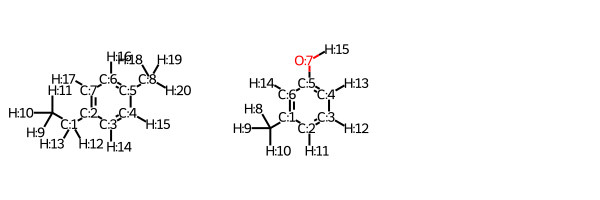

__________________________________________________________________________________________________________
mobley_1036761 -> mobley_4218209
Default:
{4: 0, 5: 1, 0: 2, 7: 7, 1: 3, 2: 4, 3: 5, 13: 6, 6: 8, 18: 17, 19: 16, 12: 13, 10: 12, 14: 11, 15: 10}
Sanitised:
{8: 1, 0: 2, 1: 3, 2: 4, 3: 5, 4: 6, 5: 7, 16: 15, 15: 14, 6: 8, 18: 17, 19: 16, 12: 13, 9: 12}


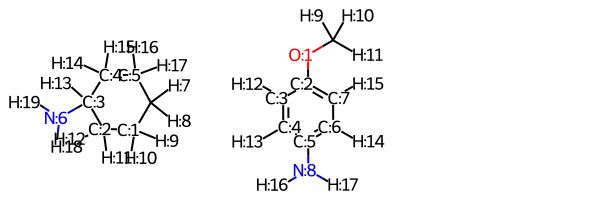

__________________________________________________________________________________________________________
mobley_9478823 -> mobley_7774695
Default:
{7: 0, 6: 1, 1: 2, 0: 3, 9: 4, 10: 12, 2: 7, 3: 6, 4: 5, 13: 14, 12: 15, 11: 16, 5: 11, 15: 10, 16: 9, 17: 8}
Sanitised:
{17: 0, 7: 1, 6: 2, 5: 3, 4: 4, 3: 5, 2: 6, 1: 7, 0: 16, 11: 15, 12: 14, 13: 13, 14: 12, 16: 11}


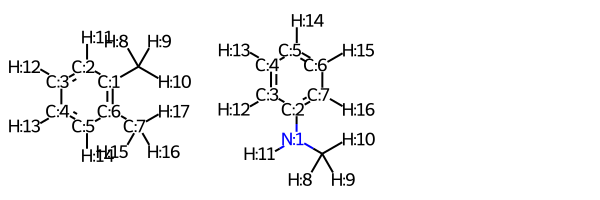

__________________________________________________________________________________________________________


KeyboardInterrupt: 

In [52]:
#plot_perts(quints_infos.sort_values(by="sem", ascending=False).head(200))
handled = []

for pert in tqdm(quints_infos["pertname"].values):
    
    if not pert in handled:

        plotInfo(pert.split("~")[0], pert.split("~")[1])
    
    # make sure we don't do the same pert again (or the inverse of it).
    handled.append(pert)
    handled.append(pert.split("~")[1]+"~"+pert.split("~")[0])